# TCC LUCAS E PEDRO

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import pandas as pd
import datetime as dt
import yfinance as yf
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from os.path import isfile, join
import numpy as np
import statsmodels.api as sm
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
from scipy import stats
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
print(__version__) # requires version >= 1.9.0
from scipy.stats import norm
# For Notebooks
init_notebook_mode(connected=True)
# For offline use

cf.go_offline()

4.9.0


In [2]:
df = pd.read_excel("ativos_brasileiros.xlsx")
df.head()

,Data,LTN,LFT,OURO,DÓLAR,IBOV
0,2019-12-01,0.005654,0.003921,0.0361,-0.0513,0.0685
1,2019-11-01,0.005654,0.003981,-0.0307,0.0543,0.0095
2,2019-10-01,0.005654,0.005017,0.0278,-0.0330,0.0236
3,2019-09-01,0.005654,0.004856,-0.0353,0.0025,0.0357
4,2019-08-01,0.005654,0.005255,0.0620,0.0872,-0.0067


In [3]:
VOL=df.std()*np.sqrt(12)
print(VOL)

LTN      0.000000
LFT      0.008118
OURO     0.160387
DÓLAR    0.156878
IBOV     0.196544
dtype: float64


In [4]:
Media_Aritmetica=df.mean()*12

In [5]:
from scipy.stats.mstats import gmean
df.set_index('Data', inplace=True)
df

,LTN,LFT,OURO,DÓLAR,IBOV
Data,,,,,
2019-12-01,0.005654,0.003921,0.0361,-0.0513,0.0685
2019-11-01,0.005654,0.003981,-0.0307,0.0543,0.0095
2019-10-01,0.005654,0.005017,0.0278,-0.0330,0.0236
2019-09-01,0.005654,0.004856,-0.0353,0.0025,0.0357
2019-08-01,0.005654,0.005255,0.0620,0.0872,-0.0067
...,...,...,...,...,...
2010-05-01,0.005654,0.008424,0.0272,0.0475,-0.0664
2010-04-01,0.005654,0.007462,0.0600,-0.0258,-0.0404
2010-03-01,0.005654,0.008515,-0.0045,-0.0131,0.0582


In [6]:
Retorno_GEOMETRICO=(gmean(df + 1)- 1)*12

In [7]:
Retorno_GEOMETRICO

array([0.06784974, 0.10120973, 0.03483483, 0.08387402, 0.05232009])

### Comparação entre o retorno real dos ativos e o retorno do modelo de Markowitz

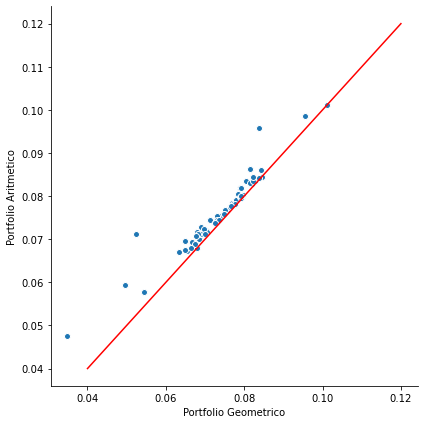

In [8]:
vetor=df.values
Portfolio_Aritmetico=[];
Portfolio_Geometrico=[];

i=0
j=0

for i in range(5):
    for j in range(5):
        
        #Portfolio Aritmetico
        c = Media_Aritmetica[i]*0.5 + Media_Aritmetica[j]*0.5
        Portfolio_Aritmetico.append(c)
        
        #Portfolio Geometrico
        d = (vetor[:,i]*0.5 + vetor[:,j]*0.5)
        truegeo=(gmean(d + 1)- 1)*12
        Portfolio_Geometrico.append(truegeo)

for ind in range(50):

    # Create Random Weights
    weights1 = np.array(np.random.random(5))

    # Rebalance Weights
    weights1 = weights1 / np.sum(weights1)
    
    # Portfolio Aritmetico
    x = np.sum(Media_Aritmetica * weights1)
    Portfolio_Aritmetico.append(x)
    
    #Portfolio Geometrico
    z = np.dot(vetor,weights1)
    truegeo1=(gmean(z + 1)- 1)*12
    Portfolio_Geometrico.append(truegeo1)
    

Portfolio_Aritmetico   


data = pd.DataFrame(Portfolio_Geometrico,columns=["Portfolio Geometrico"])
data["Portfolio Aritmetico"]=Portfolio_Aritmetico

data.iplot(kind='scatter',x='Portfolio Geometrico',y='Portfolio Aritmetico',mode='markers',size=10)


X_plot = np.linspace(0.04, 0.12, 100)
Y_plot = X_plot

g = sns.FacetGrid(data, size = 6)
g = g.map(plt.scatter, "Portfolio Geometrico", "Portfolio Aritmetico", edgecolor="w")
plt.plot(X_plot, Y_plot, color='r')
plt.show()

### Comparação entre o retorno real dos ativos e o retorno do modelo com base na média geométrica dos retornos dos ativos

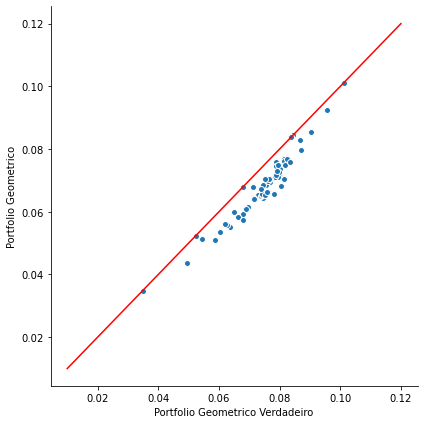

In [9]:
vetor=df.values
Portfolio_Geometrico=[];
Portfolio_Geometrico_Verdadeiro=[];

i=0
j=0

for i in range(5):
    for j in range(5):
        
        #Portfolio Aritmetico
        c = Retorno_GEOMETRICO[i]*0.5 + Retorno_GEOMETRICO[j]*0.5
        Portfolio_Geometrico.append(c)
        
        #Portfolio Geometrico
        d = (vetor[:,i]*0.5 + vetor[:,j]*0.5)
        truegeo=(gmean(d + 1)- 1)*12
        Portfolio_Geometrico_Verdadeiro.append(truegeo)

for ind in range(50):

    # Create Random Weights
    weights1 = np.array(np.random.random(5))

    # Rebalance Weights
    weights1 = weights1 / np.sum(weights1)
    
    # Portfolio Aritmetico
    x = np.sum(Retorno_GEOMETRICO * weights1)
    Portfolio_Geometrico.append(x)
    
    #Portfolio Geometrico
    z = np.dot(vetor,weights1)
    truegeo1=(gmean(z + 1)- 1)*12
    Portfolio_Geometrico_Verdadeiro.append(truegeo1)
       


data1 = pd.DataFrame(Portfolio_Geometrico_Verdadeiro,columns=["Portfolio Geometrico Verdadeiro"])
data1["Portfolio Geometrico"]=Portfolio_Geometrico

data1.iplot(kind='scatter',x='Portfolio Geometrico Verdadeiro',y='Portfolio Geometrico',mode='markers',size=10)


X_plot = np.linspace(0.01, 0.12, 100)
Y_plot = X_plot

g = sns.FacetGrid(data1, size = 6)
g = g.map(plt.scatter, "Portfolio Geometrico Verdadeiro", "Portfolio Geometrico", edgecolor="w")
plt.plot(X_plot, Y_plot, color='r')
plt.show()

In [10]:
data

,Portfolio Geometrico,Portfolio Aritmetico
0,0.067850,0.067850
1,0.084538,0.084546
2,0.054524,0.057695
3,0.078850,0.081865
4,0.064815,0.069560
...,...,...
70,0.073152,0.073983
71,0.069919,0.071249
72,0.073643,0.074487
73,0.072530,0.073847


In [11]:
df.corr()

,LTN,LFT,OURO,DÓLAR,IBOV
LTN,NaN,NaN,NaN,NaN,NaN
LFT,NaN,1.000000,0.058892,-0.017842,-0.055062
OURO,NaN,0.058892,1.000000,-0.394289,0.226840
DÓLAR,NaN,-0.017842,-0.394289,1.000000,-0.616024
IBOV,NaN,-0.055062,0.226840,-0.616024,1.000000


In [12]:
df.cov()

,LTN,LFT,OURO,DÓLAR,IBOV
LTN,0.0,0.000000,0.000000,0.000000,0.000000
LFT,0.0,0.000005,0.000006,-0.000002,-0.000007
OURO,0.0,0.000006,0.002144,-0.000827,0.000596
DÓLAR,0.0,-0.000002,-0.000827,0.002051,-0.001583
IBOV,0.0,-0.000007,0.000596,-0.001583,0.003219


### Comparação entre o retorno real dos ativos e o retorno do modelo A(1,0)

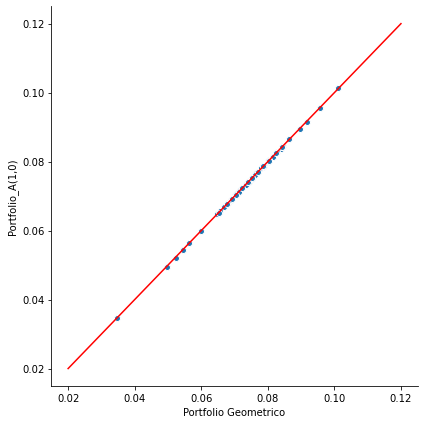

In [13]:
#A(1,0)
vetor=df.values
Portfolio_A=[];
Portfolio_Geometrico=[];
C=df.cov()
COVAR=C.values

i=0
j=0

for i in range(5):
    for j in range(5):
        
        #Portfolio Aritmetico
        c = Media_Aritmetica[i]*0.5 + Media_Aritmetica[j]*0.5-((VOL[i]*0.5)**2+(VOL[j]*0.5)**2+2*0.5*0.5*COVAR[i,j]*12)/2
        Portfolio_A.append(c)
        
        #Portfolio Geometrico
        d = (vetor[:,i]*0.5 + vetor[:,j]*0.5)
        truegeo=(gmean(d + 1)- 1)*12
        Portfolio_Geometrico.append(truegeo)
        
Portfolio_A

for ind in range(50):

    # Create Random Weights
    weights1 = np.array(np.random.random(5))

    # Rebalance Weights
    weights1 = weights1 / np.sum(weights1)
    
    # Portfolio Aritmetico
    x = np.sum(Media_Aritmetica * weights1)-(np.dot(weights1.T, np.dot(df.cov() * 12, weights1)))/2
    Portfolio_A.append(x)
    
    #Portfolio Geometrico
    z = np.dot(vetor,weights1)
    truegeo1=(gmean(z + 1)- 1)*12
    Portfolio_Geometrico.append(truegeo1)
    
    
data = pd.DataFrame(Portfolio_Geometrico,columns=["Portfolio Geometrico"])
data["Portfolio_A(1,0)"]=Portfolio_A

data.iplot(kind='scatter',x='Portfolio Geometrico',y='Portfolio_A(1,0)',mode='markers',size=10)


X_plot = np.linspace(0.02, 0.12, 100)
Y_plot = X_plot

g = sns.FacetGrid(data, size = 6)
g = g.map(plt.scatter, "Portfolio Geometrico", "Portfolio_A(1,0)", edgecolor="w")
plt.plot(X_plot, Y_plot, color='r')
plt.show()


### Comparação entre o retorno real dos ativos e o retorno do modelo A(1,1)

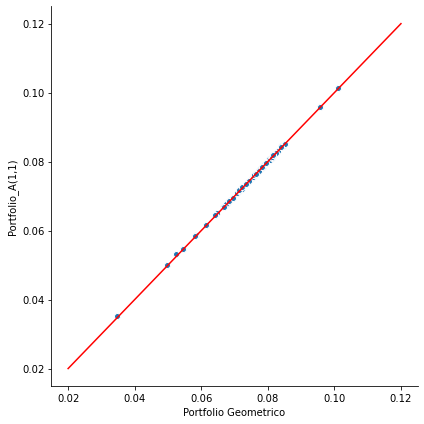

In [14]:
#A(1,1)
vetor=df.values
Portfolio_A=[];
Portfolio_Geometrico=[];
C=df.cov()
COVAR=C.values

i=0
j=0

for i in range(5):
    for j in range(5):
        
        #Portfolio Aritmetico
        c = Media_Aritmetica[i]*0.5 + Media_Aritmetica[j]*0.5-((VOL[i]*0.5)**2+(VOL[j]*0.5)**2+2*0.5*0.5*COVAR[i,j]*12)/(2*(1+Media_Aritmetica[i]*0.5 + Media_Aritmetica[j]*0.5))
        Portfolio_A.append(c)
        
        #Portfolio Geometrico
        d = (vetor[:,i]*0.5 + vetor[:,j]*0.5)
        truegeo=(gmean(d + 1)- 1)*12
        Portfolio_Geometrico.append(truegeo)
        
Portfolio_A

for ind in range(50):

    # Create Random Weights
    weights1 = np.array(np.random.random(5))

    # Rebalance Weights
    weights1 = weights1 / np.sum(weights1)
    
    # Portfolio Aritmetico
    x = np.sum(Media_Aritmetica * weights1)-(np.dot(weights1.T, np.dot(df.cov() * 12, weights1)))/(2*(1+np.sum(Media_Aritmetica * weights1)))
    Portfolio_A.append(x)
    
    #Portfolio Geometrico
    z = np.dot(vetor,weights1)
    truegeo1=(gmean(z + 1)- 1)*12
    Portfolio_Geometrico.append(truegeo1)
    
    
data = pd.DataFrame(Portfolio_Geometrico,columns=["Portfolio Geometrico"])
data["Portfolio_A(1,1)"]=Portfolio_A

data.iplot(kind='scatter',x='Portfolio Geometrico',y='Portfolio_A(1,1)',mode='markers',size=10)


X_plot = np.linspace(0.02, 0.12, 100)
Y_plot = X_plot

g = sns.FacetGrid(data, size = 6)
g = g.map(plt.scatter, "Portfolio Geometrico", "Portfolio_A(1,1)", edgecolor="w")
plt.plot(X_plot, Y_plot, color='r')
plt.show()

### Comparação entre o retorno real dos ativos e o retorno do modelo G(1,0)

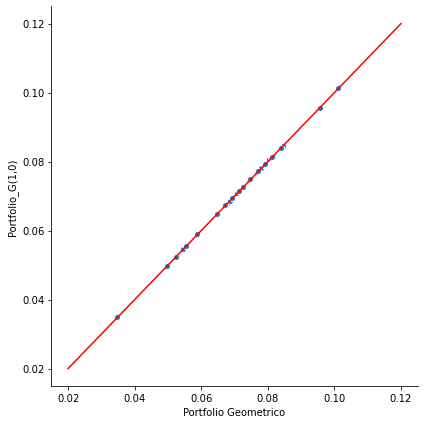

In [15]:
#G(1,0)
vetor=df.values
Portfolio_G=[];
Portfolio_Geometrico=[];
C=df.cov()
COVAR=C.values

i=0
j=0

for i in range(5):
    for j in range(5):
        
        #Portfolio Aritmetico
        c = (2*Retorno_GEOMETRICO[i]+VOL[i]**2)*0.25 + (2*Retorno_GEOMETRICO[j]+VOL[j]**2)*0.25-((VOL[i]*0.5)**2+(VOL[j]*0.5)**2+2*0.5*0.5*COVAR[i,j]*12)/2
        Portfolio_G.append(c)
        
        #Portfolio Geometrico
        d = (vetor[:,i]*0.5 + vetor[:,j]*0.5)
        truegeo=(gmean(d + 1)- 1)*12
        Portfolio_Geometrico.append(truegeo)
        
Portfolio_G

for ind in range(25):

    # Create Random Weights
    weights1 = np.array(np.random.random(5))

    # Rebalance Weights
    weights1 = weights1 / np.sum(weights1)
    
    # Portfolio Aritmetico
    x = np.sum((2*Retorno_GEOMETRICO+VOL**2)/2 * weights1)-(np.dot(weights1.T, np.dot(df.cov() * 12, weights1)))/2
    Portfolio_G.append(x)
    
    #Portfolio Geometrico
    z = np.dot(vetor,weights1)
    truegeo1=(gmean(z + 1)- 1)*12
    Portfolio_Geometrico.append(truegeo1)
    
    
data = pd.DataFrame(Portfolio_Geometrico,columns=["Portfolio Geometrico"])
data["Portfolio_G(1,0)"]=Portfolio_G

data.iplot(kind='scatter',x='Portfolio Geometrico',y='Portfolio_G(1,0)',mode='markers',size=10)


X_plot = np.linspace(0.02, 0.12, 100)
Y_plot = X_plot

g = sns.FacetGrid(data, size = 6)
g = g.map(plt.scatter, "Portfolio Geometrico", "Portfolio_G(1,0)", edgecolor="w")
plt.plot(X_plot, Y_plot, color='r')
plt.show()

### Comparação entre o retorno real dos ativos e o retorno do modelo G(1,1)

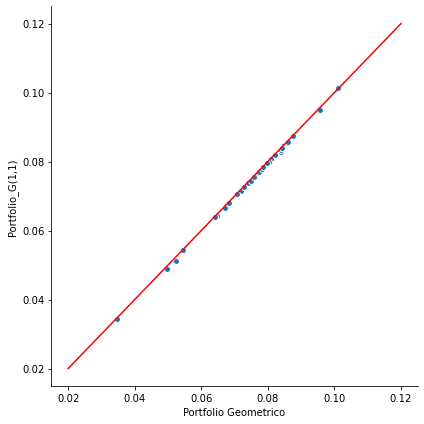

In [16]:
#G(1,1)
vetor=df.values
Portfolio_G=[];
Portfolio_Geometrico=[];
C=df.cov()
COVAR=C.values

i=0
j=0

for i in range(5):
    for j in range(5):
        
        #Portfolio Aritmetico
        c = 0.5*(2*Retorno_GEOMETRICO[i]+VOL[i]**2)/(1-Retorno_GEOMETRICO[i]+np.sqrt((1+Retorno_GEOMETRICO[i])**2+2*VOL[i]**2)) + 0.5*(2*Retorno_GEOMETRICO[j]+VOL[j]**2)/(1-Retorno_GEOMETRICO[j]+np.sqrt((1+Retorno_GEOMETRICO[j])**2+2*VOL[j]**2))-((VOL[i]*0.5)**2+(VOL[j]*0.5)**2+2*0.5*0.5*COVAR[i,j]*12)/2
        Portfolio_G.append(c)
        
        #Portfolio Geometrico
        d = (vetor[:,i]*0.5 + vetor[:,j]*0.5)
        truegeo=(gmean(d + 1)- 1)*12
        Portfolio_Geometrico.append(truegeo)
        
Portfolio_G

for ind in range(50):

    # Create Random Weights
    weights1 = np.array(np.random.random(5))

    # Rebalance Weights
    weights1 = weights1 / np.sum(weights1)
    
    # Portfolio Aritmetico
    x = np.sum((2*Retorno_GEOMETRICO+VOL**2)/(1-Retorno_GEOMETRICO+np.sqrt((1+Retorno_GEOMETRICO)**2+2*VOL**2))* weights1)-(np.dot(weights1.T, np.dot(df.cov() * 12, weights1)))/(2*(1+np.sum(np.sum((2*Retorno_GEOMETRICO+VOL**2)/(1-Retorno_GEOMETRICO+np.sqrt((1+Retorno_GEOMETRICO)**2+2*VOL**2))* weights1))))
    Portfolio_G.append(x)
    
    #Portfolio Geometrico
    z = np.dot(vetor,weights1)
    truegeo1=(gmean(z + 1)- 1)*12
    Portfolio_Geometrico.append(truegeo1)

    
    
data = pd.DataFrame(Portfolio_Geometrico,columns=["Portfolio Geometrico"])
data["Portfolio_G(1,1)"]=Portfolio_G

data.iplot(kind='scatter',x='Portfolio Geometrico',y='Portfolio_G(1,1)',mode='markers',size=10)


X_plot = np.linspace(0.02, 0.12, 100)
Y_plot = X_plot

g = sns.FacetGrid(data, size = 6)
g = g.map(plt.scatter, "Portfolio Geometrico", "Portfolio_G(1,1)", edgecolor="w")
plt.plot(X_plot, Y_plot, color='r')
plt.show()


In [17]:
C

,LTN,LFT,OURO,DÓLAR,IBOV
LTN,0.0,0.000000,0.000000,0.000000,0.000000
LFT,0.0,0.000005,0.000006,-0.000002,-0.000007
OURO,0.0,0.000006,0.002144,-0.000827,0.000596
DÓLAR,0.0,-0.000002,-0.000827,0.002051,-0.001583
IBOV,0.0,-0.000007,0.000596,-0.001583,0.003219


In [18]:
df1=pd.read_excel("aa.xlsx")
df1.head()

,DATA,Ibovespa,Dolar,DOW JONES
0,2016-07-01,0.1038,0.0110,0.0280
1,2016-06-01,0.0739,-0.1101,0.0080
2,2016-05-01,-0.1086,0.0510,0.0008
3,2016-04-01,0.0889,-0.0439,0.0050
4,2016-03-01,0.1584,-0.1054,0.0708


In [19]:
df1.set_index('DATA', inplace=True)
VOL1=df1.std()*np.sqrt(12)
Media_Aritmetica1=df1.mean()*12
Retorno_GEOMETRICO1=(gmean(df1 + 1)- 1)*12

In [20]:
Retorno_GEOMETRICO1

array([0.04379354, 0.04032328, 0.04993947])

In [21]:
#A(1,0)
vetor=df1.values
Portfolio_A=[];
Portfolio_Geometrico=[];
C=df1.cov()
COVAR=C.values
n=5000
all_weights = np.zeros((n,3))
ret_arr1 = np.zeros(n)
vol_arr1 = np.zeros(n)
sharpe_arr1= np.zeros(n)

for ind in range(n):

    # Create Random Weights
    weights1 = np.array(np.random.random(3))
    weights1 = weights1 / np.sum(weights1)
    all_weights[ind,:] = weights1
    
    # Rebalance Weights

    
    # Portfolio Aritmetico
    ret_arr1[ind] = np.sum(Media_Aritmetica1 * weights1)-(np.dot(weights1.T, np.dot(df1.cov() * 12, weights1)))/2
    vol_arr1[ind] = np.sqrt(np.dot(weights1.T, np.dot(df1.cov() * 12, weights1)))

    # Sharpe Ratio
    sharpe_arr1[ind] = (ret_arr1[ind]-0.02)/vol_arr1[ind]
    
ret_arr1.max()
pesos1=all_weights[ret_arr1.argmax(),:]

pesos_A10= pd.DataFrame(data=pesos1) 
pesos_A10.rename(index={0:'IBOV',1: 'DOLAR',2: 'DOW JONES'},inplace=True)
pesos_A10.rename(columns ={0:"Pesos A(1,0)"}, inplace = True)


In [22]:
portfolioA10_Aritmetica=sum(Media_Aritmetica1*pesos1)
portfolioA10_Geometrica=ret_arr1.max()
GeometricoA10=np.dot(vetor,pesos1)
portfolioA10_trueGeometrica=(gmean(GeometricoA10 + 1)- 1)*12
vol=np.sqrt(np.dot(pesos1.T, np.dot(df1.cov() * 12, pesos1)))
dataA10=np.array([[portfolioA10_Aritmetica],[portfolioA10_Geometrica],[portfolioA10_trueGeometrica],[vol]])
dataA10= pd.DataFrame(data=dataA10) 
dataA10.rename(index={0: 'Retorno Arimetico',1: 'Retorno Modelo',2: 'Retorno Geometrico Real',3: 'Vol'},inplace=True)
dataA10.rename(columns ={0:"PORTFOLIO A(1,0)"}, inplace = True)
dataA10

,"PORTFOLIO A(1,0)"
Retorno Arimetico,0.063399
Retorno Modelo,0.059094
Retorno Geometrico Real,0.059140
Vol,0.092780


In [23]:
#G(1,0)
vetor=df1.values
Portfolio_A=[];
Portfolio_Geometrico=[];
C=df1.cov()
COVAR=C.values
all_weights = np.zeros((n,3))
ret_arr2 = np.zeros(n)
vol_arr2 = np.zeros(n)
sharpe_arr2 = np.zeros(n)

for ind in range(n):

    # Create Random Weights
    weights1 = np.array(np.random.random(3))
    weights1 = weights1 / np.sum(weights1)
    all_weights[ind,:] = weights1
    
    # Rebalance Weights

    
    # Portfolio Aritmetico
    ret_arr2[ind] =  np.sum((2*Retorno_GEOMETRICO1+VOL1**2)/2 * weights1)-(np.dot(weights1.T, np.dot(df1.cov() * 12, weights1)))/2
    vol_arr2[ind] = np.sqrt(np.dot(weights1.T, np.dot(df1.cov() * 12, weights1)))

    # Sharpe Ratio
    sharpe_arr2[ind] = (ret_arr2[ind]-0.02)/vol_arr2[ind]
    
ret_arr2.max()
pesos1=all_weights[ret_arr2.argmax(),:]

pesos_G10= pd.DataFrame(data=pesos1) 
pesos_G10.rename(index={0: 'IBOV',1: 'DOLAR',2: 'DOW JONES'},inplace=True)
pesos_G10.rename(columns ={0:"Pesos G(1,0)"}, inplace = True)



In [24]:
portfolioG10_Aritmetica=np.sum((2*Retorno_GEOMETRICO1+VOL1**2)/2 * pesos1)
portfolioG10_Geometrica=ret_arr2.max()
GeometricoG10=np.dot(vetor,pesos1)
portfolioG10_trueGeometrica=(gmean(GeometricoG10 + 1)- 1)*12
vol=np.sqrt(np.dot(pesos1.T, np.dot(df1.cov() * 12, pesos1)))
dataG10=np.array([[portfolioG10_Aritmetica],[portfolioG10_Geometrica],[portfolioG10_trueGeometrica],[vol]])
dataG10= pd.DataFrame(data=dataG10) 
dataG10.rename(index={0: 'Retorno Arimetico',1: 'Retorno Modelo',2: 'Retorno Geometrico Real',3: 'Vol'},inplace=True)
dataG10.rename(columns ={0:"PORTFOLIO G(1,0)"}, inplace = True)
dataG10

,"PORTFOLIO G(1,0)"
Retorno Arimetico,0.063547
Retorno Modelo,0.059305
Retorno Geometrico Real,0.059142
Vol,0.092115


In [25]:
#A(1,1)
vetor=df1.values
Portfolio_A=[];
Portfolio_Geometrico=[];
C=df1.cov()
COVAR=C.values
all_weights = np.zeros((n,3))
ret_arr3 = np.zeros(n)
vol_arr3 = np.zeros(n)
sharpe_arr3 = np.zeros(n)

for ind in range(n):

    # Create Random Weights
    weights1 = np.array(np.random.random(3))
    weights1 = weights1 / np.sum(weights1)
    all_weights[ind,:] = weights1
    
    # Rebalance Weights

    
    # Portfolio Aritmetico
    ret_arr3[ind] = np.sum(Media_Aritmetica1 * weights1)-(np.dot(weights1.T, np.dot(df1.cov() * 12, weights1)))/(2*(1+np.sum(Media_Aritmetica1 * weights1)))
    vol_arr3[ind] = np.sqrt(np.dot(weights1.T, np.dot(df1.cov() * 12, weights1)))

    # Sharpe Ratio
    sharpe_arr3[ind] = (ret_arr3[ind]-0.02)/vol_arr3[ind]
    
ret_arr3.max()
pesos1=all_weights[ret_arr3.argmax(),:]

pesos_A11= pd.DataFrame(data=pesos1) 
pesos_A11.rename(index={0:'IBOV',1: 'DOLAR',2: 'DOW JONES'},inplace=True)
pesos_A11.rename(columns ={0:"Pesos A(1,1)"}, inplace = True)



In [26]:
portfolioA11_Aritmetica=sum(Media_Aritmetica1*pesos1)
portfolioA11_Geometrica=ret_arr3.max()
GeometricoA11=np.dot(vetor,pesos1)
portfolioA11_trueGeometrica=(gmean(GeometricoA11 + 1)- 1)*12
vol=np.sqrt(np.dot(pesos1.T, np.dot(df1.cov() * 12, pesos1)))
dataA11=np.array([[portfolioA11_Aritmetica],[portfolioA11_Geometrica],[portfolioA11_trueGeometrica],[vol]])
dataA11= pd.DataFrame(data=dataA11) 
dataA11.rename(index={0: 'Retorno Arimetico',1: 'Retorno Modelo',2: 'Retorno Geometrico Real',3: 'Vol'},inplace=True)
dataA11.rename(columns ={0:"PORTFOLIO A(1,1)"}, inplace = True)
dataA11

,"PORTFOLIO A(1,1)"
Retorno Arimetico,0.063407
Retorno Modelo,0.059351
Retorno Geometrico Real,0.059140
Vol,0.092869


In [27]:
#G(1,1)
vetor=df1.values
Portfolio_A=[];
Portfolio_Geometrico=[];
C=df1.cov()
COVAR=C.values
all_weights = np.zeros((n,3))
ret_arr4 = np.zeros(n)
vol_arr4 = np.zeros(n)
sharpe_arr4 = np.zeros(n)

for ind in range(n):

    # Create Random Weights
    weights1 = np.array(np.random.random(3))
    weights1 = weights1 / np.sum(weights1)
    all_weights[ind,:] = weights1
    
    # Rebalance Weights

    
    # Portfolio Aritmetico
    ret_arr4[ind] = np.sum((2*Retorno_GEOMETRICO1+VOL1**2)/(1-Retorno_GEOMETRICO1+np.sqrt((1+Retorno_GEOMETRICO1)**2+2*VOL1**2))* weights1)-(np.dot(weights1.T, np.dot(df1.cov() * 12, weights1)))/(2*(1+np.sum(np.sum((2*Retorno_GEOMETRICO1+VOL1**2)/(1-Retorno_GEOMETRICO1+np.sqrt((1+Retorno_GEOMETRICO1)**2+2*VOL1**2))* weights1))))
    vol_arr4[ind] = np.sqrt(np.dot(weights1.T, np.dot(df1.cov() * 12, weights1)))

    # Sharpe Ratio
    sharpe_arr4[ind] = (ret_arr4[ind]-0.02)/vol_arr4[ind]
    
ret_arr4.max()
pesos1=all_weights[ret_arr4.argmax(),:]

pesos_G11= pd.DataFrame(data=pesos1) 
pesos_G11.rename(index={0: 'IBOV',1: 'DOLAR',2: 'DOW JONES'},inplace=True)
pesos_G11.rename(columns ={0:"Pesos G(1,1)"}, inplace = True)



In [28]:
portfolioG11_Aritmetica=np.sum((2*Retorno_GEOMETRICO1+VOL1**2)/(1-Retorno_GEOMETRICO1+np.sqrt((1+Retorno_GEOMETRICO1)**2+2*VOL1**2))* pesos1)
portfolioG11_Geometrica=ret_arr4.max()
GeometricoG11=np.dot(vetor,pesos1)
portfolioG11_trueGeometrica=(gmean(GeometricoG11 + 1)- 1)*12
vol=np.sqrt(np.dot(pesos1.T, np.dot(df1.cov() * 12, pesos1)))
dataG11=np.array([[portfolioG11_Aritmetica],[portfolioG11_Geometrica],[portfolioG11_trueGeometrica],[vol]])
dataG11= pd.DataFrame(data=dataG11) 
dataG11.rename(index={0: 'Retorno Arimetico',1: 'Retorno Modelo',2: 'Retorno Geometrico Real',3: 'Vol'},inplace=True)
dataG11.rename(columns ={0:"PORTFOLIO G(1,1)"}, inplace = True)
dataG11

,"PORTFOLIO G(1,1)"
Retorno Arimetico,0.062106
Retorno Modelo,0.058259
Retorno Geometrico Real,0.059136
Vol,0.090401


In [29]:

vetor=df1.values
Portfolio_A=[];
Portfolio_Geometrico=[];
C=df1.cov()
COVAR=C.values
all_weights = np.zeros((n,3))
ret_arr5 = np.zeros(n)
vol_arr5 = np.zeros(n)
sharpe_arr5 = np.zeros(n)

for ind in range(n):

    # Create Random Weights
    weights1 = np.array(np.random.random(3))
    weights1 = weights1 / np.sum(weights1)
    all_weights[ind,:] = weights1
    
    # Rebalance Weights

    
    # Portfolio Aritmetico
    trueGeometrico=np.dot(vetor,weights1)
    ret_arr5[ind] = (gmean(trueGeometrico + 1)- 1)*12
    vol_arr5[ind] = np.sqrt(np.dot(weights1.T, np.dot(df1.cov() * 12, weights1)))
    # Sharpe Ratio
    sharpe_arr5[ind] = (ret_arr5[ind]-0.02)/vol_arr5[ind]
    
ret_arr5.max()
pesos1=all_weights[ret_arr5.argmax(),:]

pesos_truegeo= pd.DataFrame(data=pesos1) 
pesos_truegeo.rename(index={0: 'IBOV',1: 'DOLAR',2: 'DOW JONES'},inplace=True)
pesos_truegeo.rename(columns ={0:"Pesos Geometrica Real"}, inplace = True)




In [30]:
portfoliotrue_Aritmetica=sum(Media_Aritmetica1*pesos1)
portfoliotrue_Geometrica=ret_arr5.max()
Geometricotrue=np.dot(vetor,pesos1)
portfoliotrue_trueGeometrica=(gmean(Geometricotrue + 1)- 1)*12
vol=np.sqrt(np.dot(pesos1.T, np.dot(df1.cov() * 12, pesos1)))
datatrue=np.array([[portfoliotrue_Aritmetica],[portfoliotrue_Geometrica],[portfoliotrue_trueGeometrica],[vol]])
datatrue= pd.DataFrame(data=datatrue) 
datatrue.rename(index={0: 'Retorno Arimetico',1: 'Retorno Modelo',2: 'Retorno Geometrico Real',3: 'Vol'},inplace=True)
datatrue.rename(columns ={0:"PORTFOLIO Média Geometrica Real"}, inplace = True)
datatrue

,PORTFOLIO Média Geometrica Real
Retorno Arimetico,0.063283
Retorno Modelo,0.059141
Retorno Geometrico Real,0.059141
Vol,0.091503


### Comparação dos retornos de cada modelo com o retorno real do portfólio

In [31]:
portfolios=pd.concat([dataA10,dataA11,dataG10,dataG11,datatrue],axis=1)
portfolios

,"PORTFOLIO A(1,0)","PORTFOLIO A(1,1)","PORTFOLIO G(1,0)","PORTFOLIO G(1,1)",PORTFOLIO Média Geometrica Real
Retorno Arimetico,0.063399,0.063407,0.063547,0.062106,0.063283
Retorno Modelo,0.059094,0.059351,0.059305,0.058259,0.059141
Retorno Geometrico Real,0.059140,0.059140,0.059142,0.059136,0.059141
Vol,0.092780,0.092869,0.092115,0.090401,0.091503


In [32]:
Pesoativos=pd.concat([pesos_A10,pesos_A11,pesos_G10,pesos_G11,pesos_truegeo],axis=1)
Pesoativos

,"Pesos A(1,0)","Pesos A(1,1)","Pesos G(1,0)","Pesos G(1,1)",Pesos Geometrica Real
IBOV,0.531922,0.532512,0.528604,0.513938,0.525069
DOLAR,0.464422,0.464194,0.468064,0.467095,0.470705
DOW JONES,0.003656,0.003294,0.003332,0.018967,0.004226


## Nessa seção, são mostradas as fronteiras simuladas para cada modelo em conjunto com a fronteira do modelo de Markowitz e com a fronteira demonstrando o retorno real dos ativos

In [33]:
#MARKOWITZ
vetor=df1.values
Portfolio_A=[];
Portfolio_Geometrico=[];
C=df1.cov()
COVAR=C.values
all_weights = np.zeros((n,3))
ret_arr6 = np.zeros(n)
vol_arr6 = np.zeros(n)
sharpe_arr6= np.zeros(n)

for ind in range(n):

    # Create Random Weights
    weights1 = np.array(np.random.random(3))
    weights1 = weights1 / np.sum(weights1)
    all_weights[ind,:] = weights1
    
    # Rebalance Weights

    
    # Portfolio Aritmetico
    ret_arr6[ind] = np.sum(Media_Aritmetica1 * weights1)
    vol_arr6[ind] = np.sqrt(np.dot(weights1.T, np.dot(df1.cov() * 12, weights1)))

    # Sharpe Ratio
    sharpe_arr6[ind] = (ret_arr6[ind]-0.02)/vol_arr6[ind]


In [34]:
#MARKOWITZ g1,0
vetor=df1.values
Portfolio_A=[];
Portfolio_Geometrico=[];
C=df1.cov()
COVAR=C.values
all_weights = np.zeros((n,3))
ret_arr7 = np.zeros(n)
vol_arr7 = np.zeros(n)
sharpe_arr7= np.zeros(n)

for ind in range(n):

    # Create Random Weights
    weights1 = np.array(np.random.random(3))
    weights1 = weights1 / np.sum(weights1)
    all_weights[ind,:] = weights1
    
    # Rebalance Weights

    
    # Portfolio Aritmetico
    ret_arr7[ind] = np.sum((2*Retorno_GEOMETRICO1+VOL1**2)/2 * weights1)
    vol_arr7[ind] = np.sqrt(np.dot(weights1.T, np.dot(df1.cov() * 12, weights1)))

    # Sharpe Ratio
    sharpe_arr7[ind] = (ret_arr7[ind]-0.02)/vol_arr7[ind]


In [35]:
#MARKOWITZ g1,1
vetor=df1.values
Portfolio_A=[];
Portfolio_Geometrico=[];
C=df1.cov()
COVAR=C.values
all_weights = np.zeros((n,3))
ret_arr8 = np.zeros(n)
vol_arr8 = np.zeros(n)
sharpe_arr8= np.zeros(n)

for ind in range(n):

    # Create Random Weights
    weights1 = np.array(np.random.random(3))
    weights1 = weights1 / np.sum(weights1)
    all_weights[ind,:] = weights1
    
    # Rebalance Weights

    
    # Portfolio Aritmetico
    ret_arr8[ind] = np.sum((2*Retorno_GEOMETRICO1+VOL1**2)/(1-Retorno_GEOMETRICO1+np.sqrt((1+Retorno_GEOMETRICO1)**2+2*VOL1**2))* weights1)
    vol_arr8[ind] = np.sqrt(np.dot(weights1.T, np.dot(df1.cov() * 12, weights1)))

    # Sharpe Ratio
    sharpe_arr8[ind] = (ret_arr8[ind]-0.02)/vol_arr8[ind]


Text(0.5, 1.0, 'Portfolio de Markowitz A(1,0)')

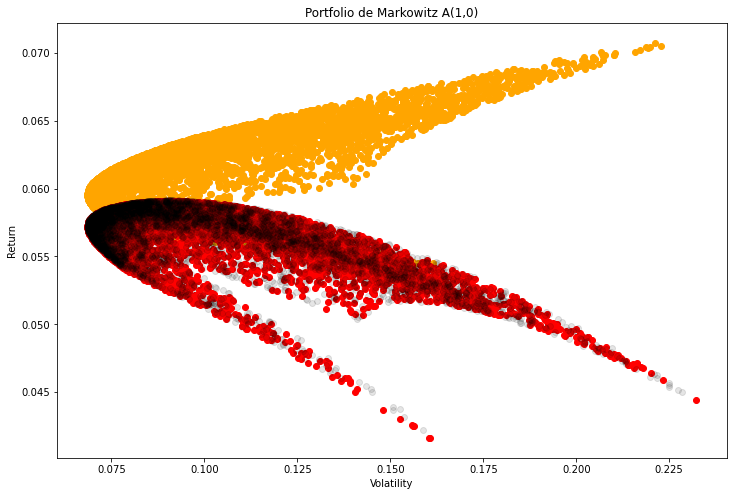

In [36]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr6,ret_arr6,c="orange")
plt.scatter(vol_arr1,ret_arr1,c="red")
plt.scatter(vol_arr5,ret_arr5,c="black",alpha=0.10)
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title("Portfolio de Markowitz A(1,0)")


Text(0.5, 1.0, 'Portfolio de Markowitz 1 G(1,0)')

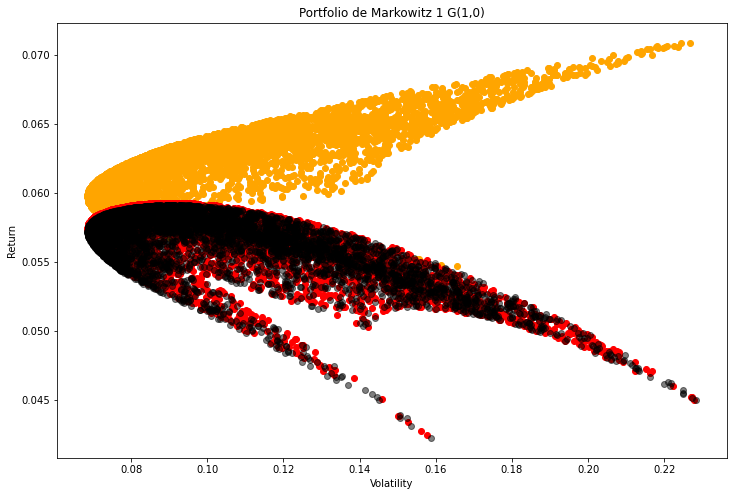

In [37]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr7,ret_arr7,c="orange")
plt.scatter(vol_arr2,ret_arr2,c="red")
plt.scatter(vol_arr5,ret_arr5,c="black",alpha=0.5)
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title("Portfolio de Markowitz 1 G(1,0)")

Text(0.5, 1.0, 'Portfolio de Markowitz 1 A(1,1)')

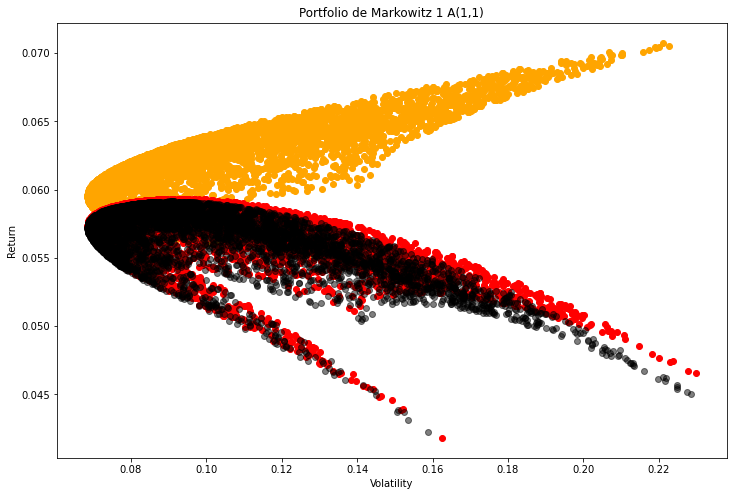

In [38]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr6,ret_arr6,c="orange")
plt.scatter(vol_arr3,ret_arr3,c="red")
plt.scatter(vol_arr5,ret_arr5,c="black",alpha=0.5)
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title("Portfolio de Markowitz 1 A(1,1)")

Text(0.5, 1.0, 'Portfolio de Markowitz 1 G(1,1)')

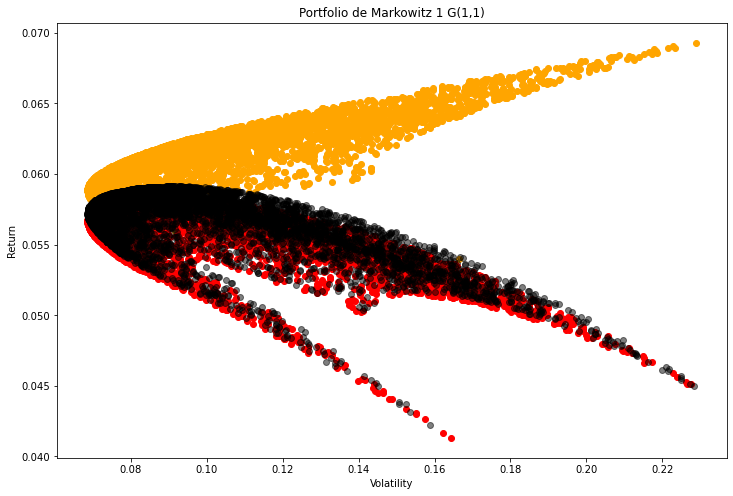

In [39]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr8,ret_arr8,c="orange")
plt.scatter(vol_arr4,ret_arr4,c="red")
plt.scatter(vol_arr5,ret_arr5,c="black",alpha=0.5)
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title("Portfolio de Markowitz 1 G(1,1)")

Text(0.5, 1.0, 'Portfolio de Markowitz Aritmetico com Analise Pseudoaritmetica')

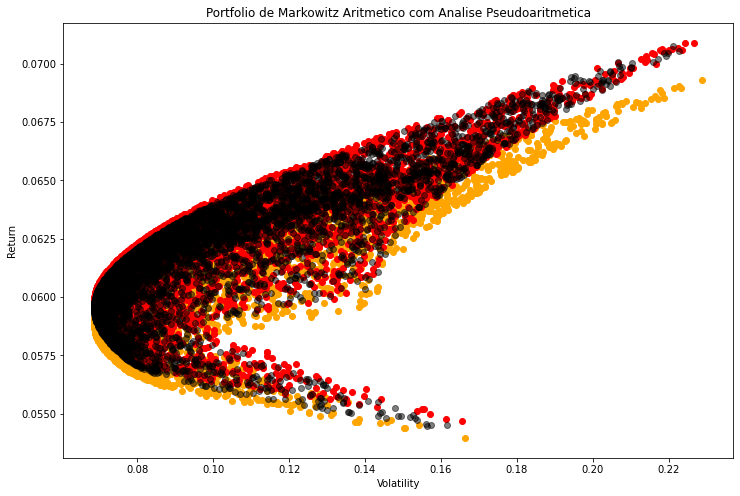

In [40]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr8,ret_arr8,c="orange")
plt.scatter(vol_arr7,ret_arr7,c="red")
plt.scatter(vol_arr6,ret_arr6,c="black",alpha=0.5)
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title("Portfolio de Markowitz Aritmetico com Analise Pseudoaritmetica")

In [41]:
Media_Aritmetica1

Ibovespa     0.071514
Dolar        0.054129
DOW JONES    0.060169
dtype: float64

In [42]:
VOL1

Ibovespa     0.235363
Dolar        0.168977
DOW JONES    0.142496
dtype: float64

In [43]:
df1.cov()

,Ibovespa,Dolar,DOW JONES
Ibovespa,0.004616,-0.002237,0.001737
Dolar,-0.002237,0.002379,-0.001001
DOW JONES,0.001737,-0.001001,0.001692


In [44]:
df1["A(1,0)"]=np.dot(vetor,pesos1)

In [45]:
log_returns=np.log(1+df1["A(1,0)"])

## Simulação de Monte Carlo

In [51]:
u=log_returns.mean()
var=log_returns.var()
drift=u-(0.5*var)
stdev=log_returns.std()
t_intervals=41

# Definir aqui a quantidade de iterações da simulação
iterations=200

daily=np.exp(drift+stdev*norm.ppf(np.random.rand(t_intervals,iterations)))
S0=df1["A(1,0)"].iloc[-1]
price_list=np.zeros_like(daily)
price_list[0]=1
for t in range(1,t_intervals):
    price_list[t]=price_list[t-1]*daily[t]



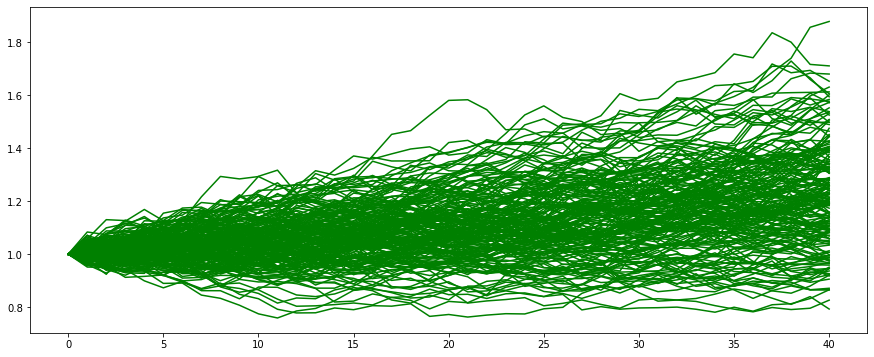

In [52]:
plt.figure(figsize=(15,6))
plt.plot(price_list,color='green')

In [48]:
df2=pd.read_excel("bb.xlsx")
df2.head()
df2.set_index('DATA', inplace=True)

In [49]:
vetor1=df2.values
df2["A(1,0)"]=np.dot(vetor1,pesos1)

In [50]:
S0=df1["A(1,0)"].iloc[-1]